In [1]:
import numpy as np, cmb as CMB, plottools as pl, binning as bn
from matplotlib.pyplot import *

In [2]:
# define parameters
lmax  = 1000       # maximum multipole of output normalization
L = np.linspace(0,lmax,lmax+1)
simn = 100

In [3]:
quad = ['TB','EB','BB']
labs = [r'$\Theta B$',r'$EB$',r'$BB$']
color = ['c','m','g','b','y']

In [4]:
ucl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_scalCls.dat',output='array')[:,:lmax+1]

In [5]:
mb = bn.multipole_binning(15,lmax=lmax,spc='p2')
s  = (L*(L+1))**2/2/np.pi
ugg = ucl[3,:]*s*np.pi/180.
cgg = bn.binning(ugg,mb)
# binning correction
cor = ugg[np.int32(mb.bc)]/cgg
print(cor)

[1.10950786 1.01033928 1.00799842 1.00404783 1.00353591 0.99795373
 0.99700997 0.99488962 0.99916282 0.99913936 0.99727783 0.99719337
 0.99741085 0.9987744  0.99813774]


In [6]:
mgl, vgl = {}, {}
for w in ['ucl','lcl']:
    cl = np.zeros((simn,6,lmax+1))
    for i in range(simn):
        fname = '../data_local/sim/cross_spec_'+str(i).zfill(5)+'_'+w+'.dat'
        cl[i,:,:] = np.loadtxt(fname,unpack=True)[:,:lmax+1]
    clb = bn.binning(cl*s[None,None,:],mb)
    mgl[w] = np.mean(clb,axis=0)
    vgl[w] = np.std(clb,axis=0)

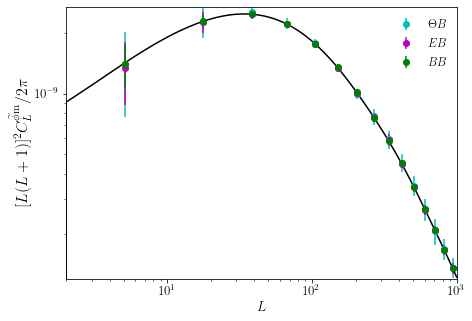

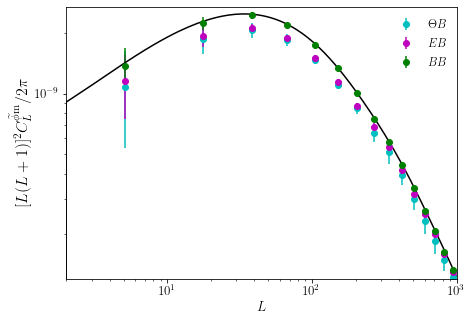

<Figure size 504x360 with 0 Axes>

In [7]:
for w in ['lcl','ucl']:
    pl.plot_1dstyle(usetex=True,fsize=[7,5],xmin=2,xmax=1000,ymin=1.2e-10,ymax=2.7e-9,xlog=True,ylog=True,ylabsize=16,xticks_labsize=13,
                    yticks_labsize=13,legend_size=12,ylab=r'$[L(L+1)]^2 C^{\widetilde{\phi}\rm m}_L/2\pi$')
    for qi, (q,lab,c) in enumerate(zip(quad,labs,color)):
        errorbar(mb.bc,cor*mgl[w][qi],yerr=cor*vgl[w][qi],label=lab,color=c,fmt='o')
    plot(L,ugg,color='k')
    legend()
    savefig('fig_sim_'+w+'.pdf')
    show()
    clf()